In [3]:
import os
import sys
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers, optimizers
from keras.utils import np_utils

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
data_path = '/kaggle/input/ravdess1/'

In [5]:
train_features_df = pd.read_csv(data_path + 'train_dataset_augmented.csv')
test_features_df = pd.read_csv(data_path + 'test_dataset_augmented.csv')

In [6]:
X_train = train_features_df.iloc[:, :-1]
y_train = train_features_df.iloc[:, -1:]

X_test = test_features_df.iloc[:, :-1]
y_test = test_features_df.iloc[:, -1:]

In [7]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test = encoder.transform(np.array(y_test).reshape(-1,1)).toarray()

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [10]:
x_train_cnn, x_valid_cnn, y_train_cnn, y_valid_cnn = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [11]:
def CNN_model():
    model = models.Sequential()

    model.add(tf.keras.layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv1D(64, 5,padding='same',))
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(8, activation='sigmoid'))

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

    return model

In [12]:
CNN_clasifier = CNN_model()
hist = CNN_clasifier.fit(x_train_cnn, y_train_cnn, batch_size=256, epochs=1000, validation_data=(x_valid_cnn, y_valid_cnn))

2022-12-26 21:12:58.334015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 21:12:58.334994: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 21:12:58.345109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 21:12:58.345939: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 21:12:58.346731: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/1000


2022-12-26 21:13:01.486903: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


12/12 [==============================] - 4s 46ms/step - loss: 2.0755 - accuracy: 0.1202 - val_loss: 2.0694 - val_accuracy: 0.1481
Epoch 2/1000
12/12 [==============================] - 0s 13ms/step - loss: 2.0585 - accuracy: 0.1351 - val_loss: 2.0504 - val_accuracy: 0.1481
Epoch 3/1000
12/12 [==============================] - 0s 13ms/step - loss: 2.0399 - accuracy: 0.1324 - val_loss: 2.0271 - val_accuracy: 0.1481
Epoch 4/1000
12/12 [==============================] - 0s 13ms/step - loss: 2.0236 - accuracy: 0.1355 - val_loss: 2.0107 - val_accuracy: 0.1481
Epoch 5/1000
12/12 [==============================] - 0s 13ms/step - loss: 2.0066 - accuracy: 0.1457 - val_loss: 2.0012 - val_accuracy: 0.1500
Epoch 6/1000
12/12 [==============================] - 0s 13ms/step - loss: 2.0016 - accuracy: 0.1603 - val_loss: 1.9955 - val_accuracy: 0.1635
Epoch 7/1000
12/12 [==============================] - 0s 13ms/step - loss: 1.9935 - accuracy: 0.1762 - val_loss: 1.9900 - val_accuracy: 0.1846
Epoch 8/1000

9/9 [==============================] - 0s 5ms/step - loss: 2.3388 - accuracy: 0.6351
Accuracy of our model on test data :  63.50877285003662 %


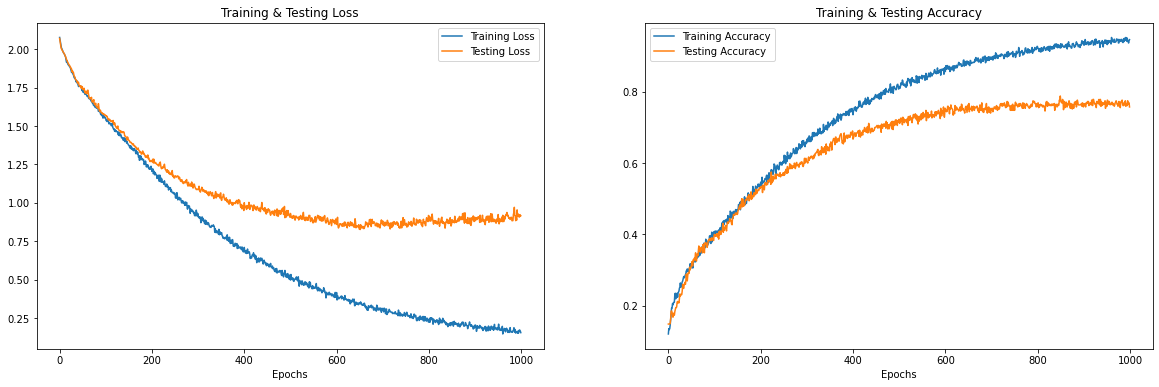

In [14]:
print("Accuracy of our model on test data : " , CNN_clasifier.evaluate(X_test, y_test)[1]*100 , "%")

epochs = [i for i in range(1000)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [15]:
pred_test = CNN_clasifier.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

In [16]:
compare = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
compare['Predicted Labels'] = y_pred.flatten()
compare['Actual Labels'] = y_test.flatten()

compare.head(10)

,Predicted Labels,Actual Labels
0,happy,angry
1,calm,calm
2,calm,calm
3,fear,fear
4,calm,calm
5,surprise,surprise
6,angry,angry
7,happy,fear
8,neutral,sad
9,sad,fear


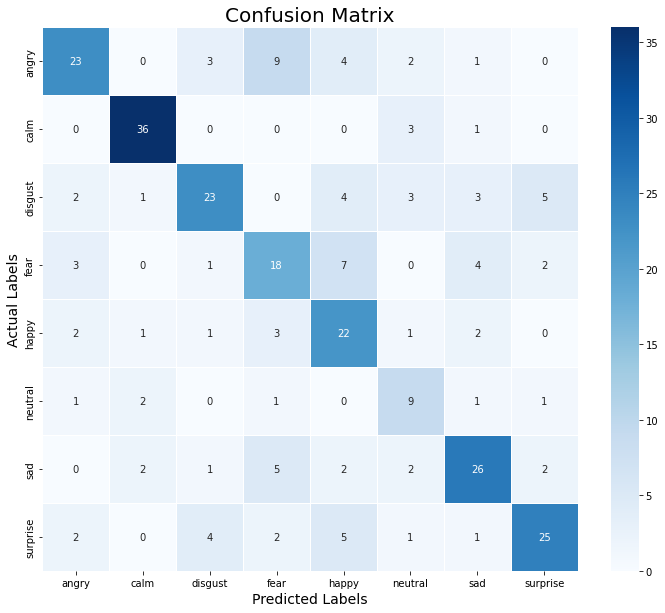

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()